In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [7]:
# Upload CSV File
print("Upload your cricket_data_2025.csv file")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name)
df.info()

# Standardize column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

#download the csv file from this link : "https://drive.google.com/file/d/1EwvZzI1crazzoT0YclRmVGzGmFKKHNT0/view?usp=sharing"


Upload your cricket_data_2025.csv file


Saving cricket_data_2025.csv to cricket_data_2025.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 957 non-null    float64
 1   Player_Name          1008 non-null   object 
 2   Matches_Batted       1008 non-null   object 
 3   Not_Outs             1008 non-null   object 
 4   Runs_Scored          1008 non-null   object 
 5   Highest_Score        1008 non-null   object 
 6   Batting_Average      1008 non-null   object 
 7   Balls_Faced          1008 non-null   object 
 8   Batting_Strike_Rate  1008 non-null   object 
 9   Centuries            1008 non-null   object 
 10  Half_Centuries       1008 non-null   object 
 11  Fours                1008 non-null   object 
 12  Sixes                1008 non-null   object 
 13  Catches_Taken        1008 non-null   object 
 14  Stumpings            1008 non-null

In [ ]:
# Data Cleaning
## Replace 'No stats' with NaN and convert numeric columns
df.replace('No stats', np.nan, inplace=True)
num_cols = ['Runs_Scored', 'Matches_Batted', 'Wickets_Taken', 'Balls_Faced', 'Fours', 'Sixes', 'Balls_Bowled', 'Runs_Conceded', 'Economy_Rate', 'Batting_Strike_Rate']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
 # Drop rows with missing values
df.dropna(subset=num_cols, inplace=True)

# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")

In [ ]:
n = int(input("Enter the number of rows you want to view from the top: "))
df.head(n)

Enter the number of rows you want to view from the top: 5


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
1,2024.0,Abdul Samad,16.0,2,182.0,37*,18.2,108.0,168.52,0,...,16,0.0,0.0,0.0,0,0,0.00,0,0,0
2,2023.0,Abdul Samad,9.0,4,169.0,37*,42.25,128.0,132.03,0,...,9,0.0,0.0,0.0,0,0,0.00,0,0,0
3,2022.0,Abdul Samad,2.0,0,4.0,4,2.0,7.0,57.14,0,...,2,6.0,8.0,0.0,0/8,0,8.00,0,0,0
4,2021.0,Abdul Samad,11.0,1,111.0,28,12.33,87.0,127.58,0,...,11,6.0,9.0,1.0,1/9,9.00,9.00,6.00,0,0
5,2020.0,Abdul Samad,12.0,3,111.0,33,22.2,65.0,170.76,0,...,12,42.0,96.0,1.0,1/41,96.00,13.71,42.00,0,0


In [ ]:
df.shape


(957, 25)

In [ ]:
df.columns

Index(['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Best_Bowling_Match',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls'],
      dtype='object')

In [ ]:
df.index

Index([   1,    2,    3,    4,    5,    7,    8,    9,   10,   11,
       ...
        997,  998,  999, 1000, 1001, 1002, 1003, 1004, 1005, 1006],
      dtype='int64', length=957)

In [ ]:
df.dtypes

,0
Year,float64
Player_Name,object
Matches_Batted,float64
Not_Outs,object
Runs_Scored,float64
Highest_Score,object
Batting_Average,object
Balls_Faced,float64
Batting_Strike_Rate,float64
Centuries,object


In [ ]:
df.isnull().sum()


,0
Year,0
Player_Name,0
Matches_Batted,0
Not_Outs,0
Runs_Scored,0
Highest_Score,0
Batting_Average,0
Balls_Faced,0
Batting_Strike_Rate,0
Centuries,0


In [ ]:
df.dropna(inplace=True)  # Drop missing values if necessary

In [ ]:
df.describe()

,Year,Matches_Batted,Runs_Scored,Balls_Faced,Batting_Strike_Rate,Fours,Sixes,Balls_Bowled,Runs_Conceded,Wickets_Taken,Economy_Rate
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,2019.718913,9.948798,144.039707,104.880878,103.387858,12.252874,6.409613,105.036573,143.520376,5.124347,6.047785
std,3.798726,5.084073,174.220783,122.324575,58.624957,16.196260,8.561825,121.655877,160.453068,6.704164,4.703552
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,5.000000,5.000000,7.000000,66.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,11.000000,59.000000,47.000000,120.990000,4.000000,2.000000,46.000000,70.000000,1.000000,7.500000
75%,2023.000000,14.000000,248.000000,179.000000,142.860000,21.000000,10.000000,209.000000,289.000000,10.000000,9.080000
max,2024.000000,19.000000,973.000000,640.000000,333.330000,85.000000,52.000000,408.000000,566.000000,32.000000,36.000000


In [ ]:
print(df.columns)


Index(['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Best_Bowling_Match',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls'],
      dtype='object')


In [ ]:
df_sorted_runs = df.sort_values(by="Runs_Scored", ascending=False)
df_sorted_runs.head()


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
956,2016.0,Virat Kohli,16.0,4,973.0,113,81.08,640.0,152.03,4,...,16,6.0,13.0,0.0,0/13,0,13.0,0,0,0
846,2023.0,Shubman Gill,17.0,2,890.0,129,59.33,564.0,157.80,3,...,17,0.0,0.0,0.0,0,0,0.0,0,0,0
320,2022.0,Jos Buttler,17.0,2,863.0,116,57.53,579.0,149.05,4,...,17,0.0,0.0,0.0,0,0,0.0,0,0,0
948,2024.0,Virat Kohli,15.0,3,741.0,113*,61.75,479.0,154.70,1,...,15,0.0,0.0,0.0,0,0,0.0,0,0,0
185,2023.0,Faf du Plessis,14.0,1,730.0,84,56.15,475.0,153.68,0,...,14,0.0,0.0,0.0,0,0,0.0,0,0,0


In [ ]:
df_sorted_wickets = df.sort_values(by="Wickets_Taken", ascending=False)
df_sorted_wickets.head()


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
236,2021.0,Harshal Patel,15.0,4,59.0,31,14.75,46.0,128.26,0,...,15,338.0,459.0,32.0,5/27,14.34,8.14,10.56,1,1
345,2020.0,Kagiso Rabada,17.0,4,56.0,15*,14.0,49.0,114.28,0,...,17,394.0,548.0,30.0,4/24,18.26,8.34,13.13,2,0
539,2023.0,Mohit Sharma,14.0,1.0,0.0,0*,0,1.0,0.00,0.0,...,14,265.0,361.0,27.0,5/10,13.37,8.17,9.81,2,1
664,2023.0,Rashid Khan,17.0,5,130.0,79*,32.5,60.0,216.67,0,...,17,402.0,552.0,27.0,4/30,20.44,8.24,14.89,1,0
282,2020.0,Jasprit Bumrah,15.0,1,5.0,5*,0.00,3.0,166.66,0,...,15,360.0,404.0,27.0,4/14,14.96,6.73,13.33,2,0


In [ ]:
df_high_strike_rate = df.loc[df["Batting_Strike_Rate"] > 140]
df_high_strike_rate.iloc[:10]  # Display the first 10 players with a strike rate above 140


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
1,2024.0,Abdul Samad,16.0,2,182.0,37*,18.2,108.0,168.52,0,...,16,0.0,0.0,0.0,0,0,0.00,0,0,0
5,2020.0,Abdul Samad,12.0,3,111.0,33,22.2,65.0,170.76,0,...,12,42.0,96.0,1.0,1/41,96.00,13.71,42.00,0,0
9,2022.0,Abhinav Manohar,8.0,1,108.0,43,18.0,75.0,144.00,0,...,8,0.0,0.0,0.0,0,0,0.00,0,0,0
10,2024.0,Abhishek Sharma,16.0,1,484.0,75*,32.27,237.0,204.22,0,...,16,42.0,51.0,2.0,2/24,25.50,7.29,21.00,0,0
11,2023.0,Abhishek Sharma,11.0,0,226.0,67,20.55,157.0,143.95,0,...,11,72.0,124.0,2.0,1/26,62.00,10.33,36.00,0,0
16,2018.0,Abhishek Sharma,3.0,2,63.0,46*,63.0,33.0,190.90,0,...,3,0.0,0.0,0.0,0,0,0.00,0,0,0
17,2024.0,Abishek Porel,14.0,2,327.0,65,32.7,205.0,159.51,0,...,14,0.0,0.0,0.0,0,0,0.00,0,0,0
28,2023.0,Ajinkya Rahane,14.0,1,326.0,71*,32.6,189.0,172.49,0,...,14.0,0.0,0.0,0.0,0,0,0.00,0,0.0,0.0
44,2023.0,Akash Deep,2.0,0,17.0,17,17.00,8.0,212.50,0,...,2,30.0,59.0,1.0,1/29,59.0,11.80,30.0,0,0
50,2024.0,Andre Russell,14.0,2,222.0,64*,31.71,120.0,185.00,0,...,15,176.0,295.0,19.0,3/19,15.53,10.06,9.26,0,0


In [ ]:
df.iloc[:, [df.columns.get_loc("Player_Name"), df.columns.get_loc("Runs_Scored")]]


,Player_Name,Runs_Scored
1,Abdul Samad,182.0
2,Abdul Samad,169.0
3,Abdul Samad,4.0
4,Abdul Samad,111.0
5,Abdul Samad,111.0
...,...,...
1002,Yuzvendra Chahal,13.0
1003,Yuzvendra Chahal,0.0
1004,Yuzvendra Chahal,1.0
1005,Yuzvendra Chahal,1.0


In [ ]:
df.iloc[:5]

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
1,2024.0,Abdul Samad,16.0,2,182.0,37*,18.2,108.0,168.52,0,...,16,0.0,0.0,0.0,0,0,0.00,0,0,0
2,2023.0,Abdul Samad,9.0,4,169.0,37*,42.25,128.0,132.03,0,...,9,0.0,0.0,0.0,0,0,0.00,0,0,0
3,2022.0,Abdul Samad,2.0,0,4.0,4,2.0,7.0,57.14,0,...,2,6.0,8.0,0.0,0/8,0,8.00,0,0,0
4,2021.0,Abdul Samad,11.0,1,111.0,28,12.33,87.0,127.58,0,...,11,6.0,9.0,1.0,1/9,9.00,9.00,6.00,0,0
5,2020.0,Abdul Samad,12.0,3,111.0,33,22.2,65.0,170.76,0,...,12,42.0,96.0,1.0,1/41,96.00,13.71,42.00,0,0


In [ ]:
df.iloc[:5, [1, 2, 3]]

,Player_Name,Matches_Batted,Not_Outs
1,Abdul Samad,16.0,2
2,Abdul Samad,9.0,4
3,Abdul Samad,2.0,0
4,Abdul Samad,11.0,1
5,Abdul Samad,12.0,3


In [ ]:
df["Runs_Scored"].value_counts()



,count
Runs_Scored,
0.0,152
1.0,36
2.0,22
7.0,17
9.0,13
...,...
557.0,1
307.0,1
65.0,1


In [ ]:
df.loc[df["Player_Name"].isin(["Virat Kohli", "Rohit Sharma", "MS Dhoni"]), ["Player_Name", "Runs_Scored"]]


,Player_Name,Runs_Scored
424,MS Dhoni,161.0
425,MS Dhoni,104.0
426,MS Dhoni,232.0
427,MS Dhoni,114.0
428,MS Dhoni,200.0
429,MS Dhoni,416.0
430,MS Dhoni,455.0
431,MS Dhoni,290.0
432,MS Dhoni,284.0
433,MS Dhoni,372.0


**EDA & VISUALIZATIONS**

<ipython-input-26-960a21dba22f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers['Player_Name'], y=top_scorers['Runs_Scored'], palette='viridis')


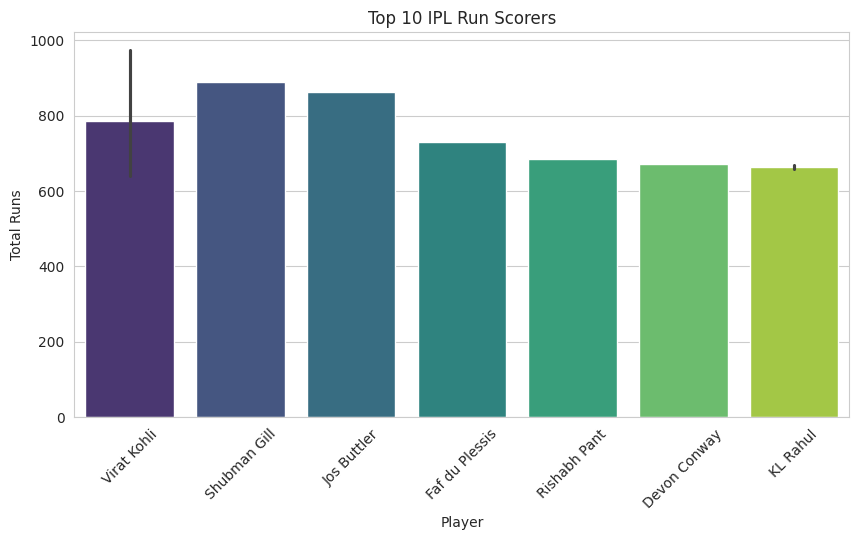

In [ ]:
# Top 10 Run Scorers
plt.figure(figsize=(10, 5))
top_scorers = df.nlargest(10, 'Runs_Scored')
sns.barplot(x=top_scorers['Player_Name'], y=top_scorers['Runs_Scored'], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Total Runs")
plt.title("Top 10 IPL Run Scorers")
plt.show()

<ipython-input-27-f16167934c06>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers['Player_Name'], y=top_wicket_takers['Wickets_Taken'], palette='magma')


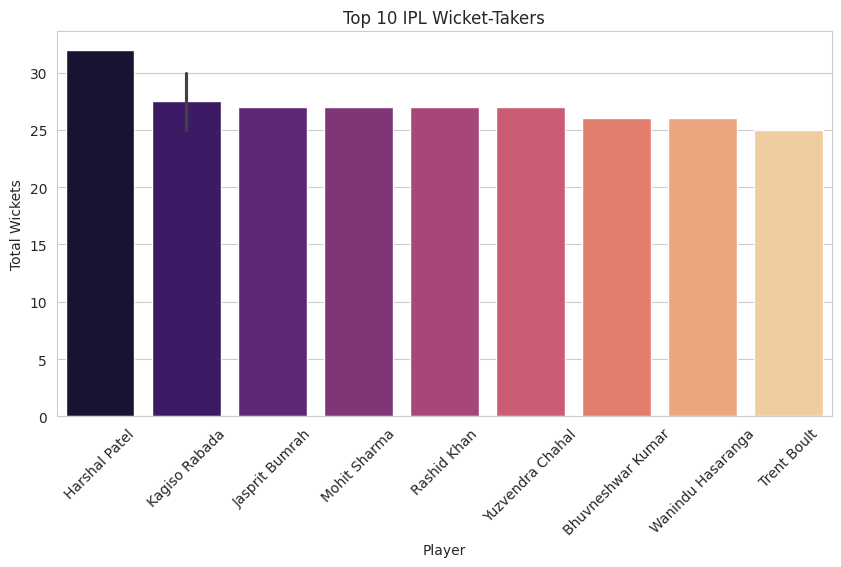

In [ ]:
# Top 10 Wicket-Takers
plt.figure(figsize=(10, 5))
top_wicket_takers = df.nlargest(10, 'Wickets_Taken')
sns.barplot(x=top_wicket_takers['Player_Name'], y=top_wicket_takers['Wickets_Taken'], palette='magma')
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Total Wickets")
plt.title("Top 10 IPL Wicket-Takers")
plt.show()


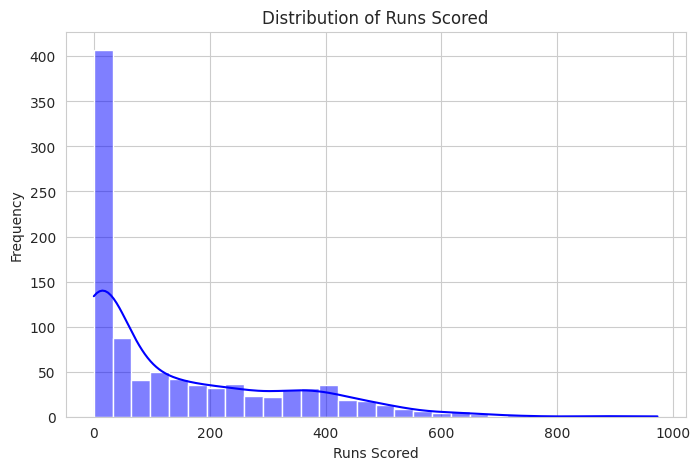

In [ ]:
# Distribution of Runs Scored
plt.figure(figsize=(8, 5))
sns.histplot(df['Runs_Scored'], bins=30, kde=True, color='blue')
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.title("Distribution of Runs Scored")
plt.show()

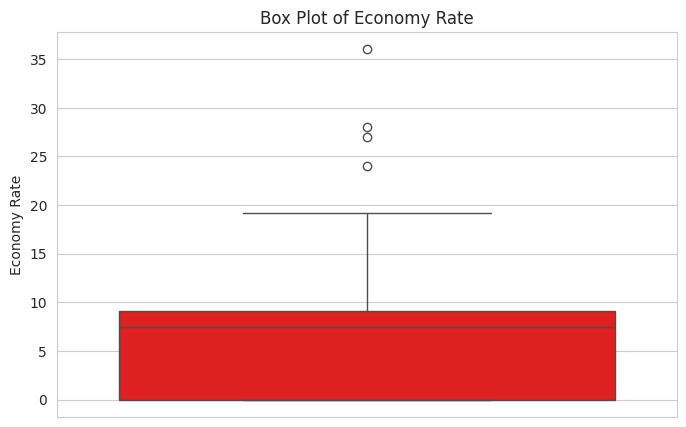

In [ ]:
# Box Plot for Economy Rate
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Economy_Rate'], color='red')
plt.ylabel("Economy Rate")
plt.title("Box Plot of Economy Rate")
plt.show()

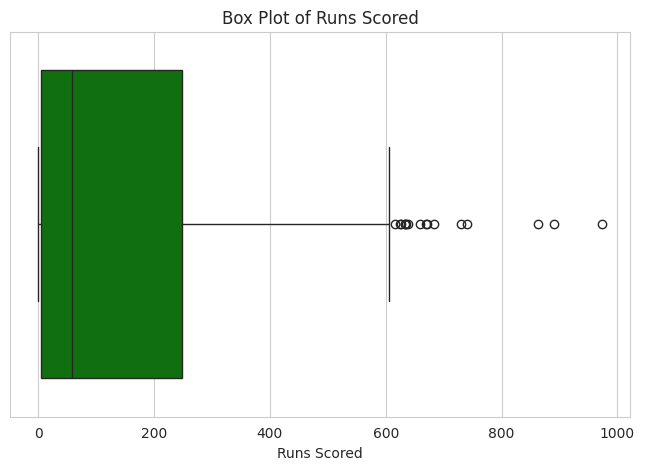

In [ ]:
# Block Plot for Runs Scored
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Runs_Scored'], color='green')
plt.xlabel("Runs Scored")
plt.title("Box Plot of Runs Scored")
plt.show()

<ipython-input-31-9659e235fcea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_runs_per_match['Player_Name'], y=top_runs_per_match['Runs_Per_Match'], palette='Greens')


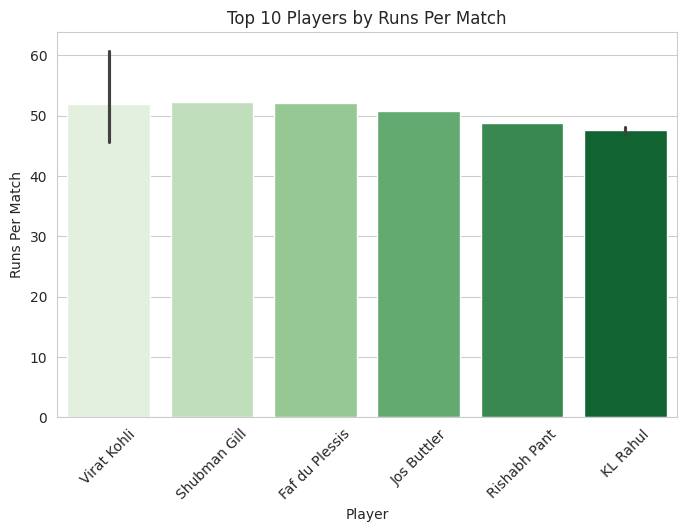

In [ ]:
# Average Runs per Match
plt.figure(figsize=(8, 5))
df['Runs_Per_Match'] = df['Runs_Scored'] / df['Matches_Batted']
top_runs_per_match = df.nlargest(10, 'Runs_Per_Match')
sns.barplot(x=top_runs_per_match['Player_Name'], y=top_runs_per_match['Runs_Per_Match'], palette='Greens')
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Runs Per Match")
plt.title("Top 10 Players by Runs Per Match")
plt.show()

<ipython-input-32-785c966d77b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_six_hitters['Player_Name'], y=top_six_hitters['Sixes'], palette='coolwarm')


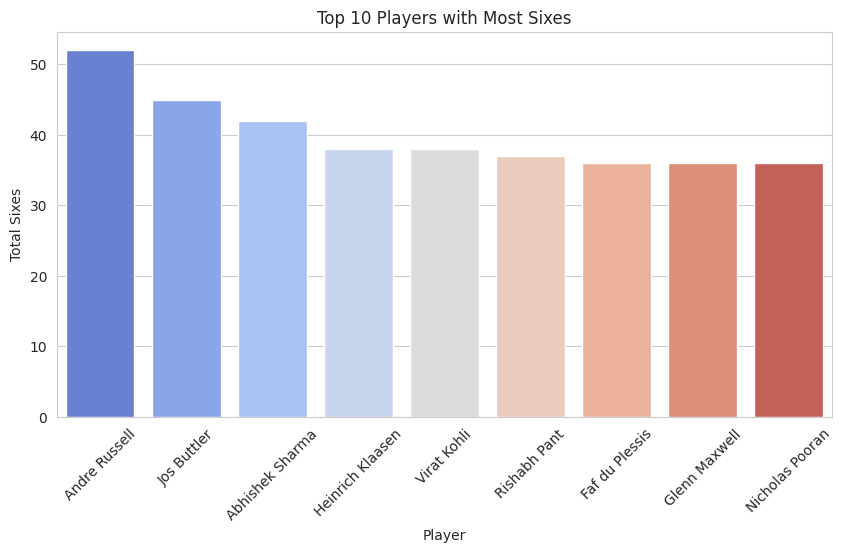

In [ ]:
# Most Six-Hitting Players
plt.figure(figsize=(10, 5))
top_six_hitters = df.nlargest(10, 'Sixes')
sns.barplot(x=top_six_hitters['Player_Name'], y=top_six_hitters['Sixes'], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Total Sixes")
plt.title("Top 10 Players with Most Sixes")
plt.show()

<ipython-input-33-6f4a51f25804>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_four_hitters['Player_Name'], y=top_four_hitters['Fours'], palette='Blues')


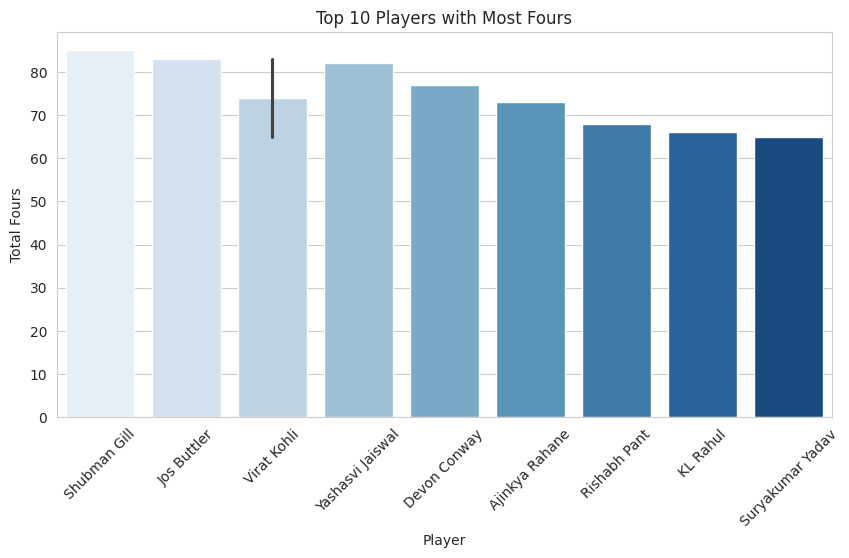

In [ ]:
# Most Four-Hitting Players
plt.figure(figsize=(10, 5))
top_four_hitters = df.nlargest(10, 'Fours')
sns.barplot(x=top_four_hitters['Player_Name'], y=top_four_hitters['Fours'], palette='Blues')
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Total Fours")
plt.title("Top 10 Players with Most Fours")
plt.show()

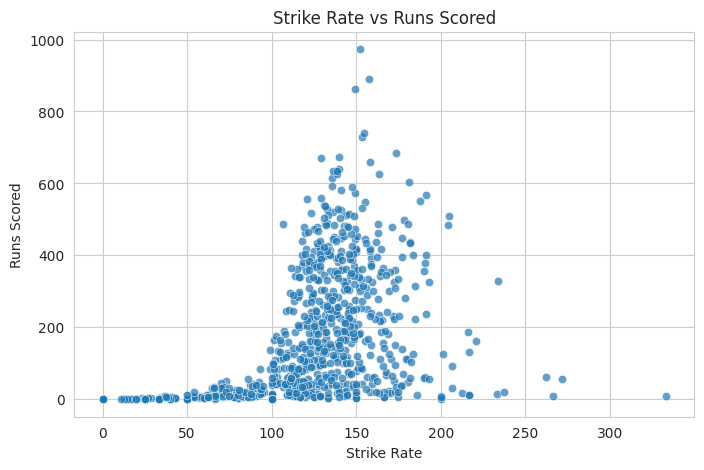

In [ ]:
# Scatter Plot for Strike Rate vs Runs Scored
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Batting_Strike_Rate'], y=df['Runs_Scored'], alpha=0.7)
plt.xlabel("Strike Rate")
plt.ylabel("Runs Scored")
plt.title("Strike Rate vs Runs Scored")
plt.show()

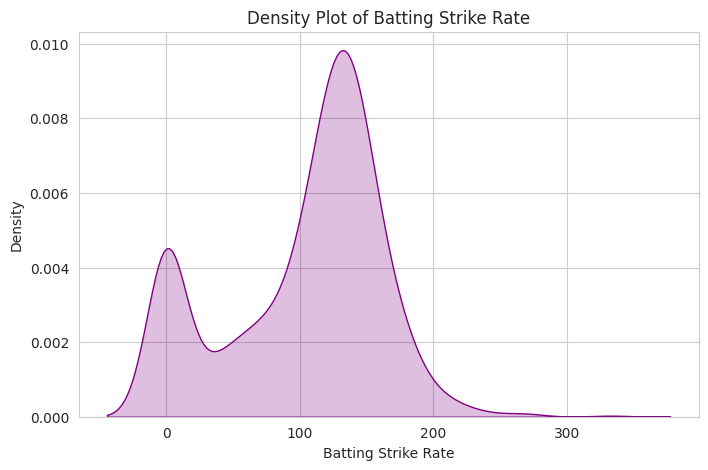

In [ ]:
# Density Plot for Batting Strike Rate
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Batting_Strike_Rate'], fill=True, color='purple')
plt.xlabel("Batting Strike Rate")
plt.ylabel("Density")
plt.title("Density Plot of Batting Strike Rate")
plt.show()

<ipython-input-36-40751d26ba26>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_matches['Player_Name'], y=top_matches['Matches_Batted'], palette='Greys')


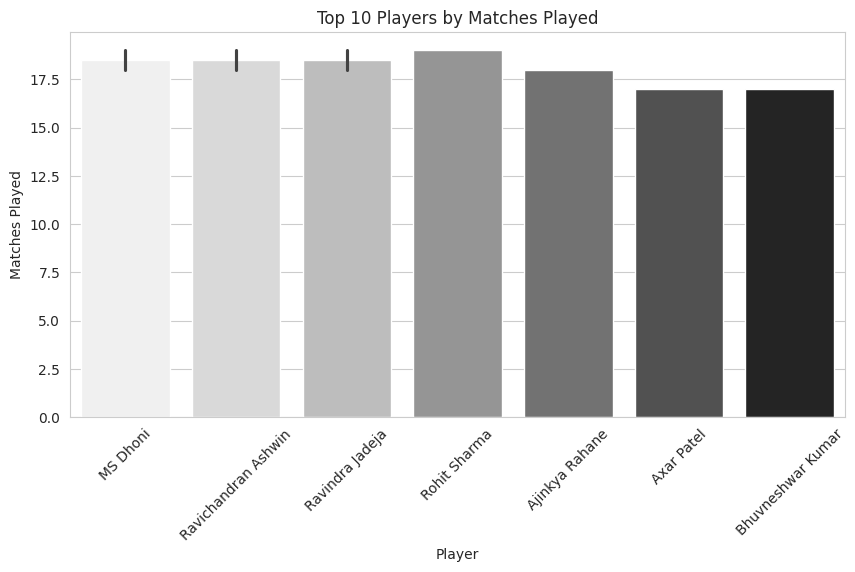

In [ ]:
# Matches Played by Players
plt.figure(figsize=(10, 5))
top_matches = df.nlargest(10, 'Matches_Batted')
sns.barplot(x=top_matches['Player_Name'], y=top_matches['Matches_Batted'], palette='Greys')
plt.xticks(rotation=45)
plt.xlabel("Player")
plt.ylabel("Matches Played")
plt.title("Top 10 Players by Matches Played")
plt.show()